In [1]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import matplotlib
import yt
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib notebook
from matplotlib.colors import LogNorm

## Plotting density

yt : [INFO     ] 2019-05-17 12:46:44,611 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-17 12:46:44,614 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 12:46:44,617 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 12:46:44,619 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 12:46:45,060 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-05-17 12:46:45,061 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-05-17 12:46:45,062 xlim = -1.000000 1.000000
yt : [INFO     ] 2019-05-17 12:46:45,063 ylim = -1.000000 1.000000
yt : [INFO     ] 2019-05-17 12:46:45,069 Making a fixed resolution buffer of (('boxlib', 'AxDens')) 800 by 800
yt : [INFO     ] 2019-05-17 12:46:45,572 Parameters: current_time              = 2.01941151592212
yt : [INFO     ] 2019-05-17 12:46:45,574 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 12:46:45,576 Parameters: domain_left_ed

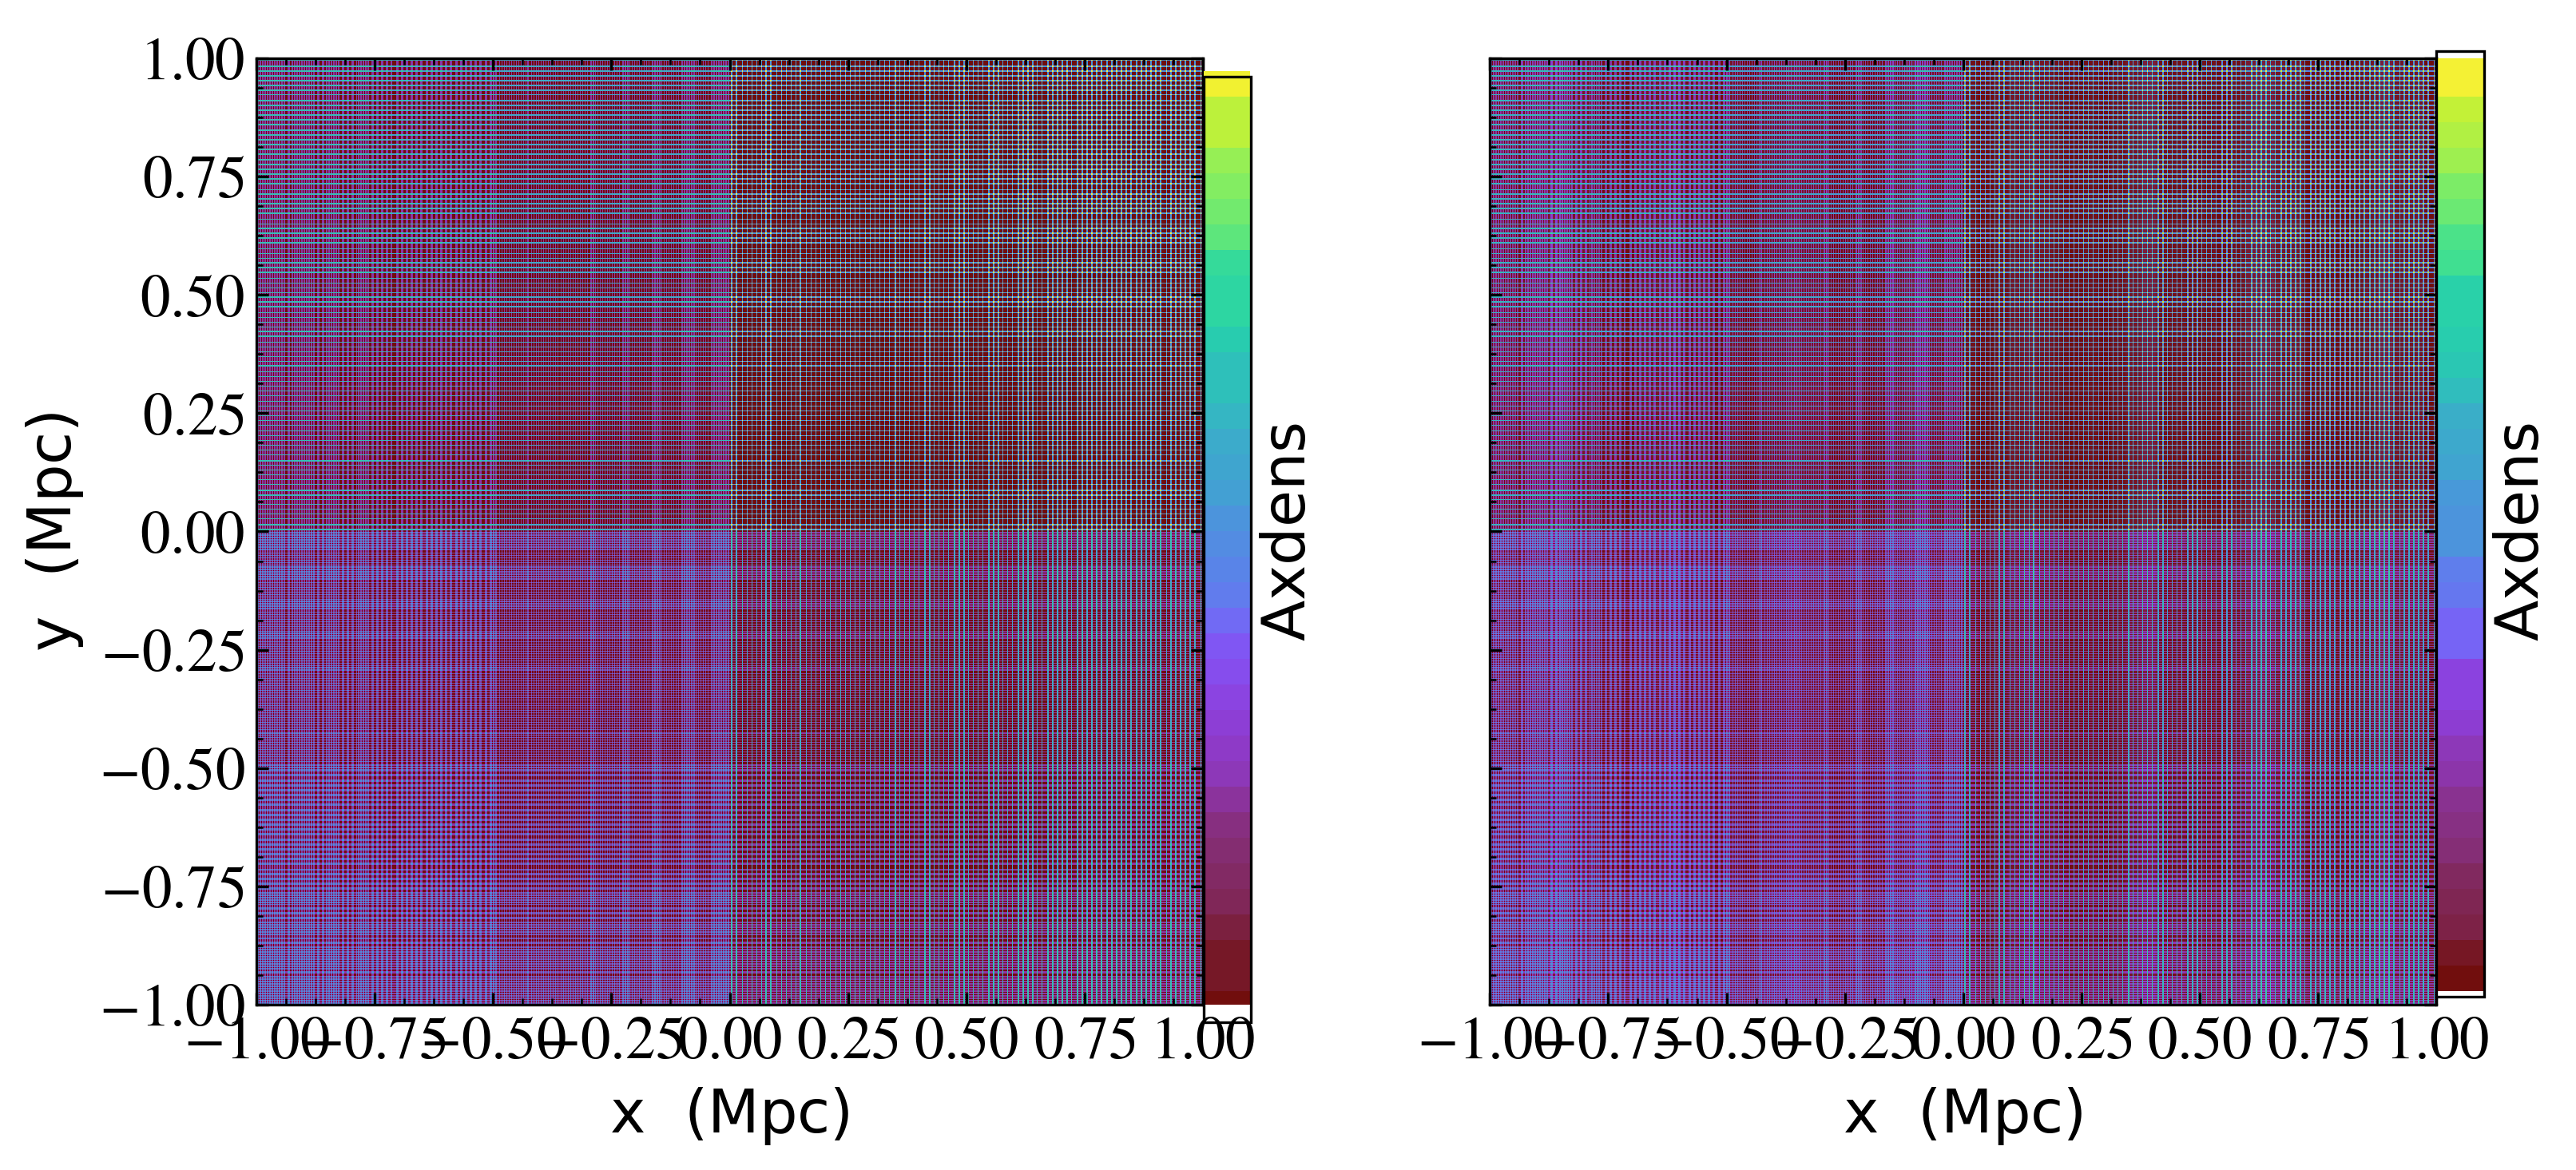

In [45]:
fig_double = plt.figure(1, figsize=(5., 2.), dpi=300)

grid = ImageGrid(fig_double, 111,
                nrows_ncols = (1, 2),
                axes_pad = 1.0,
                label_mode = "L",
                share_all = False,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="5%",
                cbar_pad="0%")

ds = yt.load("~/astrosoftware/axionyx/Exec/Test_FDM_Constant/plt_const_rx00000")
ds.field_list
p = yt.SlicePlot(ds, "z", ("boxlib","AxDens"))
plot = p.plots["AxDens"]
plot.figure = fig_double
plot.axes = grid[0].axes  
plot.cax = grid.cbar_axes[0]
p._setup_plots()


ds2 = yt.load("~/astrosoftware/axionyx/Exec/Test_FDM_Constant/plt_const_rx00100")
ds2.field_list
p2 =yt.SlicePlot(ds2, "z", ("boxlib","AxDens"))
plot2 = p2.plots["AxDens"]
plot2.figure = fig_double
plot2.axes = grid[1].axes
plot2.cax = grid.cbar_axes[1]
p2._setup_plots()

fig_double.tight_layout()
plt.show()
# fig_double.savefig("FD_FFT_comparisson-noK-cosk.png")

## Plotting the relative difference in density between two timesteps

yt : [INFO     ] 2019-05-17 12:46:52,333 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-17 12:46:52,334 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 12:46:52,335 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 12:46:52,338 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-17 12:46:52,368 Parameters: current_time              = 0.125778925355488
yt : [INFO     ] 2019-05-17 12:46:52,369 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-17 12:46:52,370 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-17 12:46:52,374 Parameters: domain_right_edge         = [1. 1. 1.]


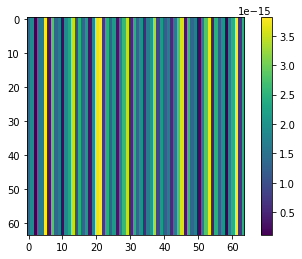

In [46]:
ds = yt.load("~/astrosoftware/axionyx/Exec/Test_FDM_Constant/plt_const_rx00000")
ds2 = yt.load("~/astrosoftware/axionyx/Exec/Test_FDM_Constant/plt_const_rx00010")
ad = ds.all_data()
ad2 = ds2.all_data()
rhs = ad[("boxlib","AxDens")]
rhs2 = ad2[("boxlib","AxDens")]

N=int(int(len(rhs))**(1/3)+0.5)

datamatrix = np.zeros((N,N,N))

for i in range(0, N):
    for j in range(0, N):
        for k in range(0, N):
            datamatrix[i,j,k]=(rhs2[i+(j+k*N)*N]-rhs[i+(j+k*N)*N])/rhs[i+(j+k*N)*N]

f,ax = plt.subplots()
im = ax.imshow(datamatrix[int(N/2),:,:])
f.colorbar(im)
plt.show()


yt : [INFO     ] 2019-05-16 17:07:28,752 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-16 17:07:28,754 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-16 17:07:28,758 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-16 17:07:28,760 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-16 17:07:28,788 Parameters: current_time              = 2.01941151592212
yt : [INFO     ] 2019-05-16 17:07:28,788 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-16 17:07:28,789 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-16 17:07:28,790 Parameters: domain_right_edge         = [1. 1. 1.]


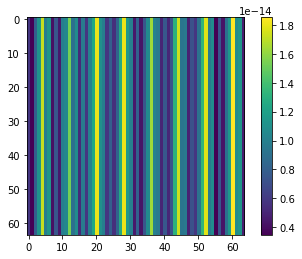

In [44]:
ds = yt.load("~/astrosoftware/axionyx/Exec/Test_FDM_Constant/plt_const_rx00000")
ds2 = yt.load("~/astrosoftware/axionyx/Exec/Test_FDM_Constant/plt_const_rx00100")
ad = ds.all_data()
ad2 = ds2.all_data()
rhs = ad[("boxlib","AxDens")]
rhs2 = ad2[("boxlib","AxDens")]

N=int(int(len(rhs))**(1/3)+0.5)

datamatrix = np.zeros((N,N,N))

for i in range(0, N):
    for j in range(0, N):
        for k in range(0, N):
            datamatrix[i,j,k]=(rhs2[i+(j+k*N)*N]-rhs[i+(j+k*N)*N])/rhs[i+(j+k*N)*N]

f,ax = plt.subplots()
im = ax.imshow(datamatrix[int(N/2),:,:])
f.colorbar(im)
plt.show()
